In [ ]:
#Mini project: Data cleaning and preprocessing
#Completed by: Nutan Phadtare
#Tools used: Python, Matplotlib, Seaborn, NumPy, Pandas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data= pd.read_csv("/content/netflix_titles.csv")
print("Few lines of Original data is:")
data.head()

Few lines of Original data is:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
#Checking for the missing values in the data
print("Missing values in each column:")
data.isnull().sum()

Missing values in each column:


,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
data.isnull().sum().sum()

np.int64(4307)

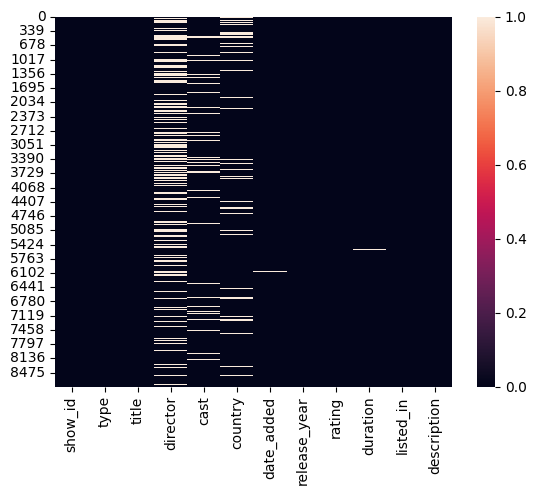

In [ ]:
sns.heatmap(data.isnull())
plt.show()

In [ ]:
#Checking the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#handling missing values by using techniques like mean, median and mode
for i in data.select_dtypes(include='object').columns:
    data[i].fillna(data[i].mode()[0])
print("Missing values are handled successfully!")

Missing values are handled successfully!


In [ ]:
#converting the categorical data into numbers using one-hot encoding
data=pd.get_dummies(data,drop_first=True)
print("Data is converted successfully!")

Data is converted successfully!


In [ ]:
#normalizing the numerical data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_cols=data.select_dtypes(include= 'int64').columns
data[numeric_cols]=scaler.fit_transform(data[numeric_cols])
print("Numerical data is normalized!")

Numerical data is normalized!


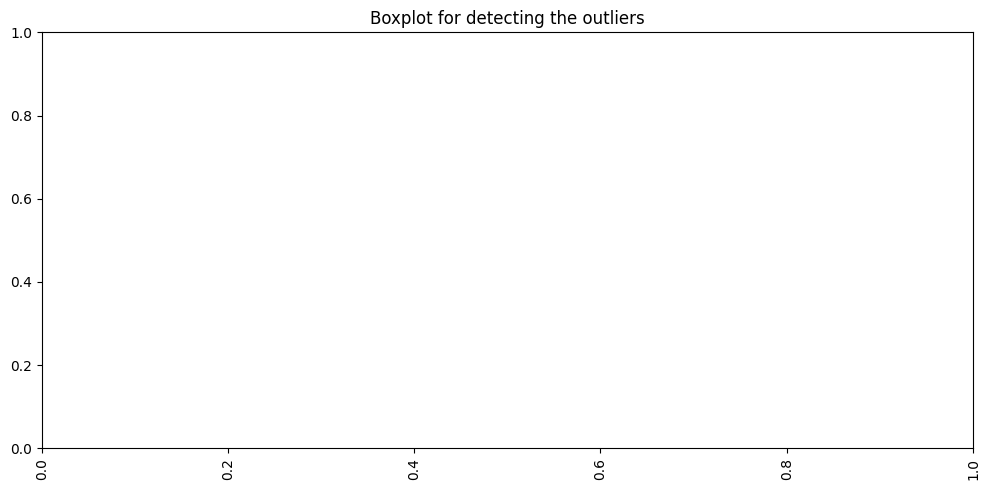

In [ ]:
#finding the outliers using the boxplot
plt.figure(figsize=(10,5))
sns.boxplot(dataset=data[numeric_cols])
plt.title("Boxplot for detecting the outliers")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
#Removing the outliers using inter-quantile range(IQR)
Q1=data[numeric_cols].quantile(0.25)
Q3=data[numeric_cols].quantile(0.75)
IQR=Q3-Q1
data = data[~((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers are removed!")
print("Shape of the cleaned data is:", data.shape)



Outliers are removed!
Shape of the cleaned data is: (8024, 41867)


In [ ]:
#save the cleaned data
data.to_csv("cleaned_netflix_titles", index=False)
print("Cleaned data is saved as 'cleaned_netflix_titles'")

Cleaned data is saved as 'cleaned_netflix_titles'
